C:\Users\nesto\AppData\Local\Temp\ipykernel_7176\2204053460.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grouped_indexes = pd.read_csv(os.path.join(outputsFolder, "grouped_indexes_monthly.csv"), parse_dates=['Month'])
C:\Users\nesto\AppData\Local\Temp\ipykernel_7176\2204053460.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_indexes_filtered['Month'] = pd.to_datetime(grouped_indexes_filtered['Month'], format='%B %Y')


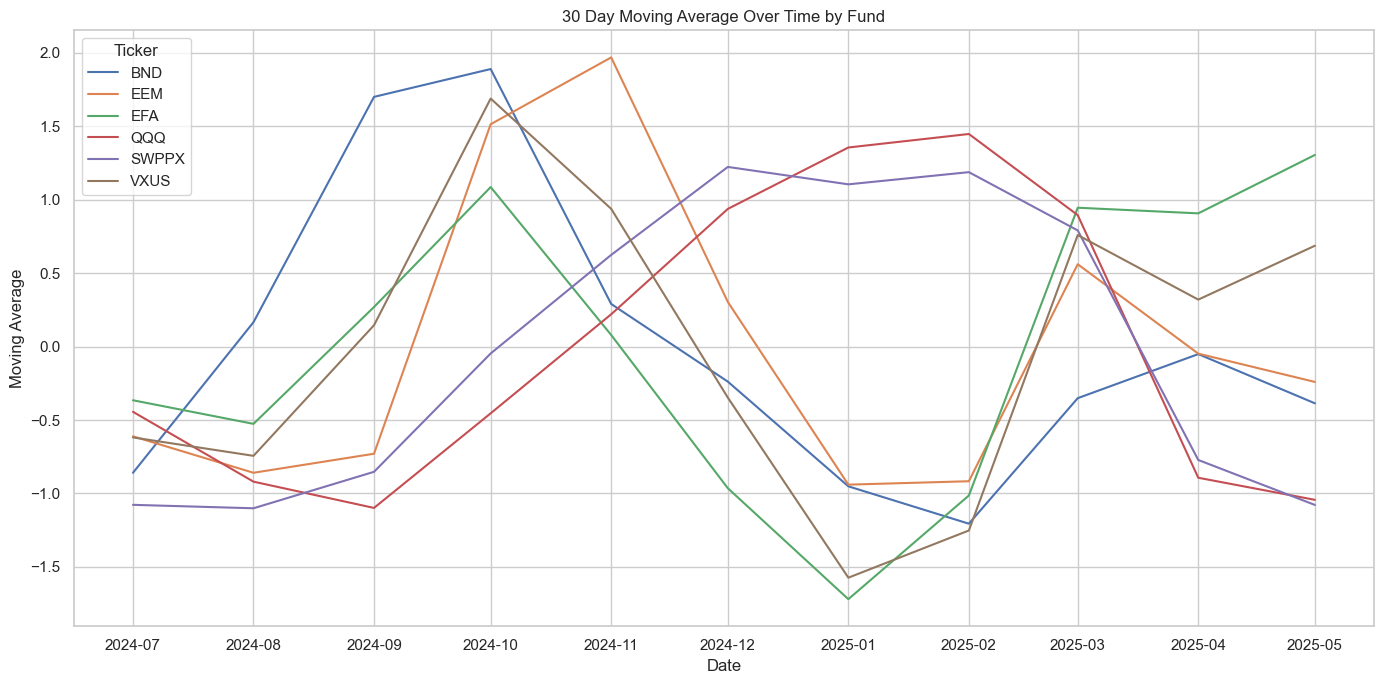

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

project = "Index Predictions"
inputsFolder = os.path.join("C:/Career Projects/", project, "Inputs")
outputsFolder = os.path.join("C:/Career Projects/", project, "Outputs")
imagesFolder = os.path.join(outputsFolder, "Images")

# Load the grouped index data
grouped_indexes = pd.read_csv(os.path.join(outputsFolder, "grouped_indexes_monthly.csv"), parse_dates=['Month'])

grouped_indexes['MA_z'] = grouped_indexes.groupby('Ticker')['MA_30'].transform(
    lambda x: (x - x.mean()) / x.std()
)

grouped_indexes['Volatility_z'] = grouped_indexes.groupby('Ticker')['Volatility_PCT'].transform(
    lambda x: (x - x.mean()) / x.std()
)


sns.set(style="whitegrid")

# Selected Tickers
selected_tickers = ['SWPPX', 'EEM', 'VXUS', 'EFA', 'BND', 'QQQ']  # Add/remove as needed
grouped_indexes_filtered = grouped_indexes[grouped_indexes['Ticker'].isin(selected_tickers)]

# Convert Month column to datetime
grouped_indexes_filtered['Month'] = pd.to_datetime(grouped_indexes_filtered['Month'], format='%B %Y')
grouped_indexes_filtered = grouped_indexes_filtered.sort_values('Month')

# Now pivot
pivot_grouped_indexes = grouped_indexes_filtered.pivot(index='Month', columns='Ticker', values='MA_z')


# Plotting
plt.figure(figsize=(14, 7))
for ticker in pivot_grouped_indexes.columns:
    plt.plot(pivot_grouped_indexes.index, pivot_grouped_indexes[ticker], label=ticker)

plt.title('30 Day Moving Average Over Time by Fund')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend(title='Ticker')
plt.tight_layout()

plt.savefig(os.path.join(imagesFolder, "MA_30.png"), dpi=300, bbox_inches='tight')
plt.show()



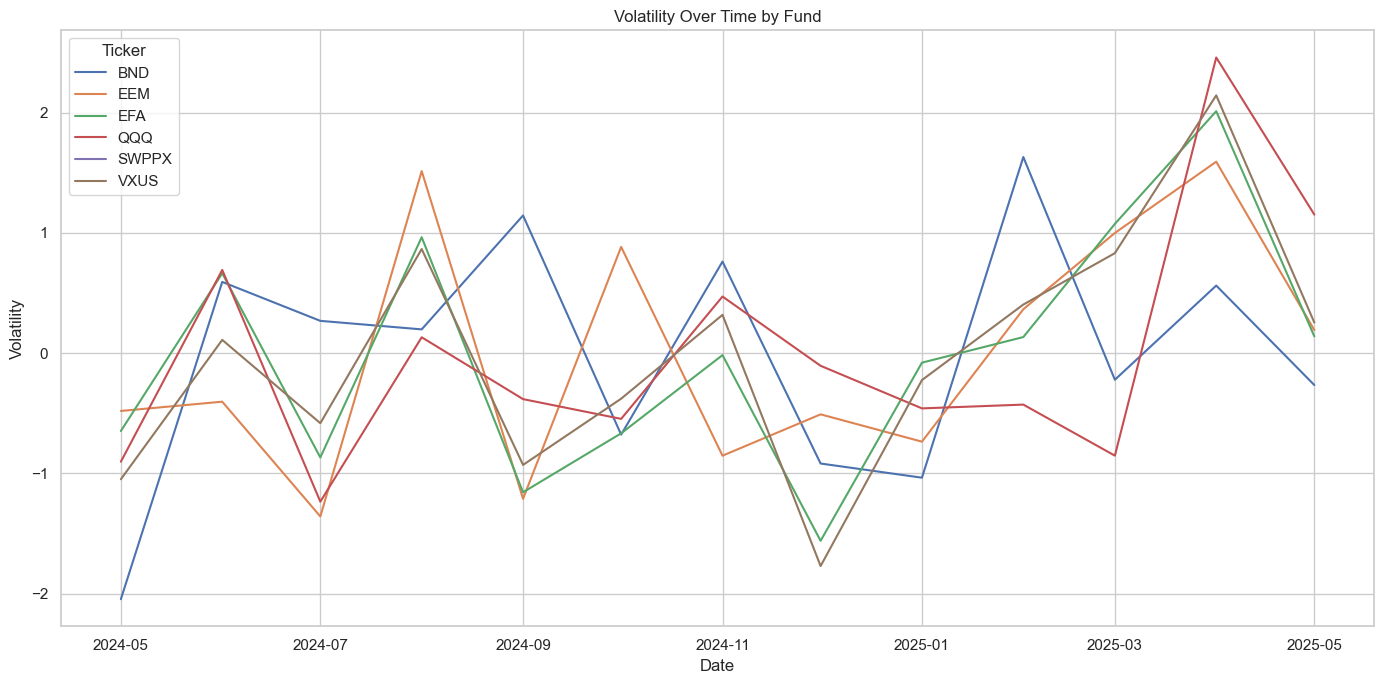

In [6]:

# Now pivot
pivot_grouped_indexes = grouped_indexes_filtered.pivot(index='Month', columns='Ticker', values='Volatility_z')

# Plotting
plt.figure(figsize=(14, 7))
for ticker in pivot_grouped_indexes.columns:
    plt.plot(pivot_grouped_indexes.index, pivot_grouped_indexes[ticker], label=ticker)

plt.title('Volatility Over Time by Fund')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(title='Ticker')
plt.tight_layout()

plt.savefig(os.path.join(imagesFolder, "Volatility.png"), dpi=300, bbox_inches='tight')
plt.show()

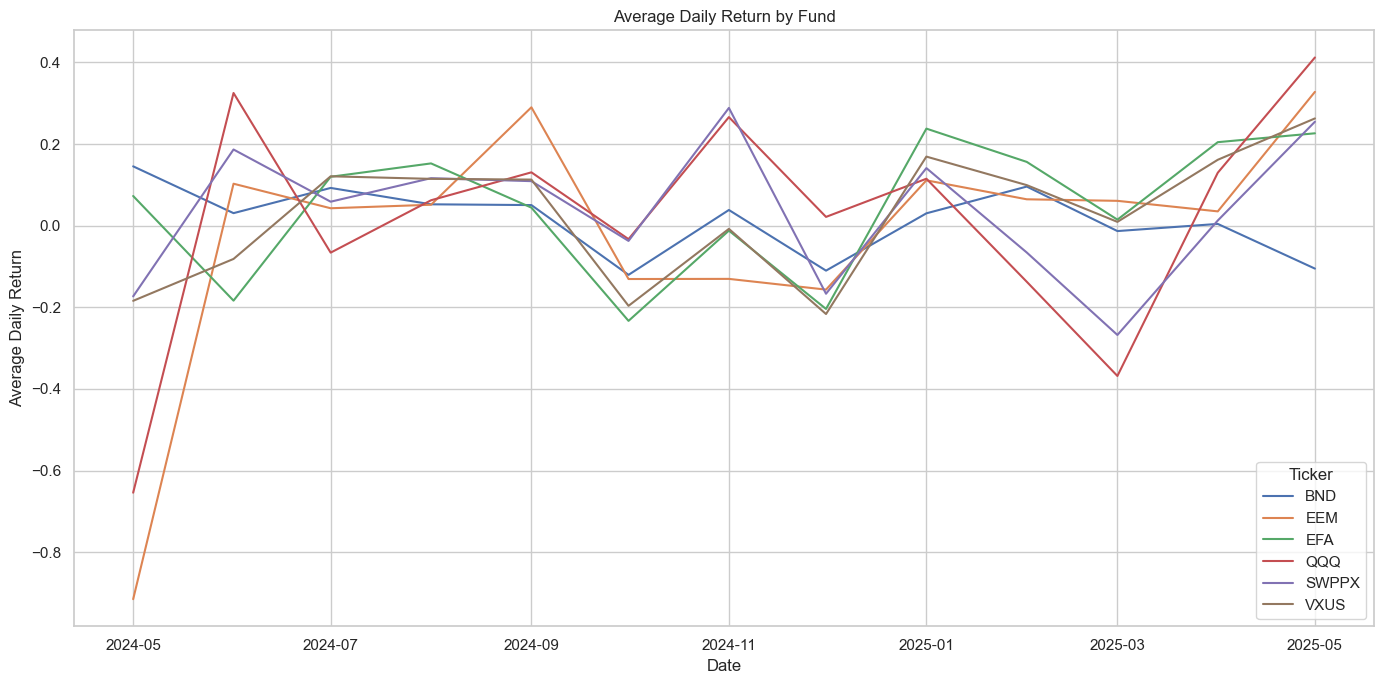

In [9]:
# Now pivot
pivot_grouped_indexes = grouped_indexes_filtered.pivot(index='Month', columns='Ticker', values='Daily_Return')

# Plotting
plt.figure(figsize=(14, 7))
for ticker in pivot_grouped_indexes.columns:
    plt.plot(pivot_grouped_indexes.index, pivot_grouped_indexes[ticker], label=ticker)

plt.title('Average Daily Return by Fund')
plt.xlabel('Date')
plt.ylabel('Average Daily Return')
plt.legend(title='Ticker')
plt.tight_layout()

plt.savefig(os.path.join(imagesFolder, "Daily_Return.png"), dpi=300, bbox_inches='tight')
plt.show()